In [31]:
from sklearn.metrics import *
import pandas as pd
import lux

In [32]:
df = pd.read_csv("ech_data.csv", sep = ";")

In [33]:
df9 = df[[
 'nbre_call_entrant_inter',
 'nbre_call_sortant_inter',
 'duree_entrant_inter',
 'duree_sortant_inter',
 'duree_total_inter',
 'duree_moy_sortant_inter',
 'duree_moy_inter',
 'nbr_cor_dist',
 'nbr_appel_abs_entr_moy',
 'nbr_appel_abs_entr_med',
 'nbr_appel_abs_entr_tot',
 'nbr_entrant_distinct_absence_tot',
 'nbr_entrant_distinct_absence_med',
 'nbr_appel_abs_sort_moy',
 'nbr_appel_abs_sort_med',
 'nbr_appel_abs_sort_tot',
 'nbre_transaction_tot',
 'nbre_transaction_med',
 'nbre_distinct_msisdn_tot',
 'nbre_distinct_msisdn_med',
 'duree_tot',
 'duree_med',
 'nbre_distinct_imei_x',
 'nombre_transaction_erecharge',
 'montant_erecharge',
 'nbre_imsi',
 'montant',
 'montant_moy',
 'nbr_om_transact',
 'volumepartage_data_med',
 'nbr_partage_data',
 'total_partage_data',
 'nombre_distinct_profil',
 'nbr_sms_total_sortant_ofnet',
 'nbr_sms_sortant_med_ofnet',
 'nbr_sms_sortant_moy_ofnet',
 'nbr_appel_sortant_moy_ofnet',
 'nbr_appel_total_sortant_ofnet',
 'nbr_appel_sortant_med_ofnet',
 'duree_total_sortant_ofnet',
 'duree_sortant_med_ofnet',
 'duree_sortant_moy_ofnet',
 'nbr_sms_total_sortant_onnet',
 'nbr_sms_sortant_med_onnet',
 'nbr_sms_sortant_moy_onnet',
 'nbr_appel_sortant_moy_onnet',
 'nbr_appel_total_sortant_onnet',
 'nbr_appel_sortant_med_onnet',
 'duree_total_sortant_onnet',
 'duree_sortant_med_onnet',
 'duree_sortant_moy_onnet',
 'nbr_rech_sos',
 'nbr_moy_sos',
 'montant_tot_sos',
 'montant_moy_sos',
 'nbr_corr_dist_entrant_sms_tot',
 'nbr_corr_dist_entrant_sms_med',
 'nbr_corr_dist_sortant_sms_tot',
 'nbr_corr_dist_sortant_sms_med',
 'nbr_duree_data_tot',
 'nbr_duree_data_med',
 'nbr_duree_data_moy',
 'volume_family_data_med',
 'nbr_family_data',
 'family_data_tot',
 'nbre_call_complice',
 'duree_x',
 'duree_moy_call_complice',
 'volume_data_total',
 'volume_data_moy',
 'volume_data_med',
 'nbre_corr_sortant',
 'nbre_corr_sortant_distinc',
 'nbre_corr_entrant',
 'nbre_corr_entrant_distinct',
 'temp_sms_moy',
 'ecartyp_temp_sms',
 'nbre_distinct_imei_y',
 'nbr_achat_pass',
 'montant_pass_med',
 'mnt_tot_pass',
 'temp_appel_moy',
 'ecartyp_temp_appel',
 'ratio_call_dist',
 'ratio_dist_sms',
 'taux_call_night',
 'taux_call_on',
 'taux_call_inter',
 'nbre_transaction',
 'nbre_distinct_msisdn']]

In [34]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:
df91 = df9.fillna(0)

In [36]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df91)

In [37]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42 }

In [38]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df91)
    sse.append(kmeans.inertia_)

In [73]:
sse1 = [5.434967701817736e+25,
 3.7292770396258056e+25,
 2.2055902154519345e+25,
 1.6823347142867633e+25,
 1.2323264279178966e+25,
 9.74123207562669e+24,
 8.061592516466469e+24,
 6.403752110130262e+24]

In [74]:
min(sse1)

6.403752110130262e+24

In [72]:
sse

[7.192179822167026e+28,
 5.434967701817736e+25,
 3.7292770396258056e+25,
 2.2055902154519345e+25,
 1.6823347142867633e+25,
 1.2323264279178966e+25,
 9.74123207562669e+24,
 8.061592516466469e+24,
 6.403752110130262e+24,
 5.445501119158123e+24]

In [47]:
len(sse)

10

In [71]:
min(sse)

5.445501119158123e+24

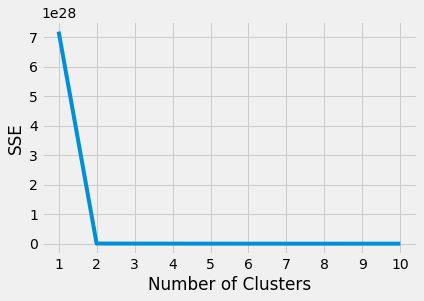

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [44]:
silhouette_scor = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(df91)
    silhouette_scor.append(silhouette_score(df91, kmeans.labels_, metric='euclidean'))

KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

KeyboardInterrupt: 

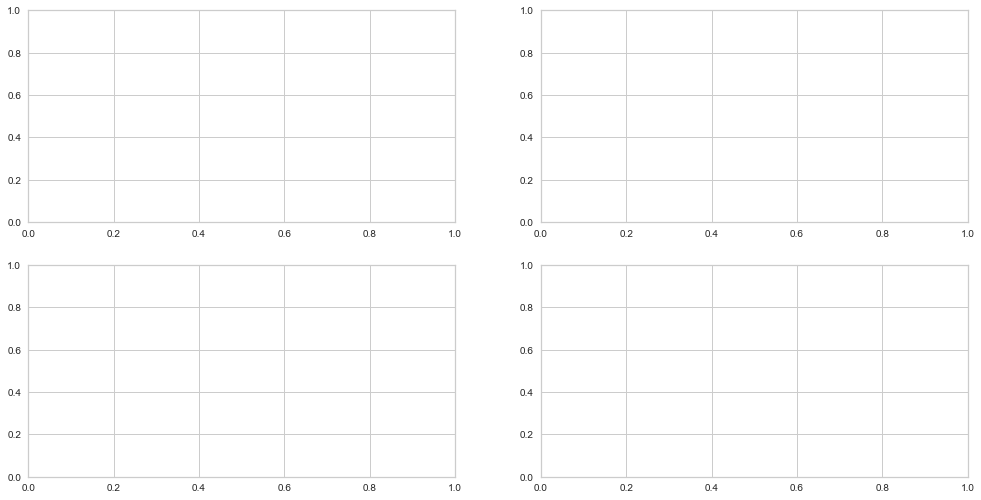

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 11):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df91)

#### Let's go for 9 classes

In [63]:
kmeans = KMeans(n_clusters=9, **kmeans_kwargs)
kmeans.fit(df91)
print(kmeans.inertia_)

6.403752110130261e+24


In [64]:
# assign a cluster to each example
yhat = kmeans.predict(df91)

In [65]:
#score = silhouette_score(df91, kmeans.labels_, metric='euclidean')

In [66]:
# retrieve unique clusters
from numpy import unique
clusters = unique(yhat, return_counts = True)

In [67]:
clusters

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([   3916,      77,   25777,      30,       1,     165, 1645607,
          87350,     687]))

In [68]:
yhat

array([6, 7, 6, ..., 6, 6, 4], dtype=int32)

In [21]:
df91.shape

(1763610, 90)

In [69]:
df91["classe"] = yhat

In [24]:
df91[df91["classe"] == 0]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
df91[df91["classe"] == 6]

/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,nbre_call_entrant_inter,nbre_call_sortant_inter,duree_entrant_inter,duree_sortant_inter,duree_total_inter,duree_moy_sortant_inter,duree_moy_inter,nbr_cor_dist,nbr_appel_abs_entr_moy,nbr_appel_abs_entr_med,...,temp_appel_moy,ecartyp_temp_appel,ratio_call_dist,ratio_dist_sms,taux_call_night,taux_call_on,taux_call_inter,nbre_transaction,nbre_distinct_msisdn,classe
1763609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [26]:
df91[df91["classe"] == 7]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [27]:
df91[df91["classe"] == 7].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [28]:
for i in range(1,8) :
    print(df91[df91["classe"] == i].shape)   

(74862, 91)
(155, 91)
(165, 91)
(1675609, 91)
(12101, 91)
(1, 91)
(687, 91)


In [54]:
import numpy as np

In [56]:
resultat =  { "classe" : [0, 1, 2, 3, 4, 5, 6, 7], "nombre" : [     30,   74862,     155,     165, 1675609,   12101,       1,
            687] , "inertie" : sse, "silhouette_score" : [0, 0.35763347707327836,
0.36081141426559715,
0.3832894071596234,
0.3627498855197289,
0.39478999960818756,
0.36885963285553164,
0.34524785939189306,
0.39063168331289955 , np.nan ] }

In [51]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [57]:
resultat.items()

dict_items([('classe', [0, 1, 2, 3, 4, 5, 6, 7]), ('nombre', [30, 74862, 155, 165, 1675609, 12101, 1, 687]), ('inertie', [7.192179822167026e+28, 5.434967701817736e+25, 3.7292770396258056e+25, 2.2055902154519345e+25, 1.6823347142867633e+25, 1.2323264279178966e+25, 9.74123207562669e+24, 8.061592516466469e+24, 6.403752110130262e+24, 5.445501119158123e+24]), ('silhouette_score', [0, 0.35763347707327836, 0.36081141426559715, 0.3832894071596234, 0.3627498855197289, 0.39478999960818756, 0.36885963285553164, 0.34524785939189306, 0.39063168331289955, nan])])

In [59]:
resultat.keys()

dict_keys(['classe', 'nombre', 'inertie', 'silhouette_score'])

In [62]:
#my_dict = {'Computer':1500,'Monitor':300,'Printer':150,'Desk':250}
#df = pd.DataFrame(list(resultat.items()),columns = list(resultat.keys()))